This file visualizes data from the World Happiness Report year 2021. The data is available on [GitHub](https://github.com/L-in-da/Influences-and-Developments-concerning-the-World-Happiness-Report/tree/main/Data).

In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import json
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
from shapely import wkt
import numpy as np
from tueplots import bundles

import warnings
warnings.filterwarnings("ignore")


plt.rcParams.update(bundles.neurips2021(usetex=False))

In [2]:
data_2021 = pd.read_csv("Data/2021.csv")

#from string to geometry object
def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

df = pd.read_csv('Data/countries_geojson.csv')
df["geojson"] = df["geojson"].apply(parse_geom)
world_map_data = gpd.GeoDataFrame(df, geometry="geojson")

In [3]:
# changing country names in case world map data has different notation
data_2021_not_in_worldmap = data_2021[~data_2021["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing = world_map_data[~world_map_data["NAME_EN"].isin(data_2021["Country name"])] #

data_2021.iloc[18,0] = "United States of America"
data_2021.iloc[73,0] = "Turkish Republic of Northern Cyprus"
data_2021.iloc[97,0] ="The Gambia"
data_2021.iloc[83,0] = "People's Republic of China"
data_2021.iloc[23,0] = "Taiwan"
data_2021.iloc[93,0]= "Republic of Macedonia"
data_2021.iloc[82,0] = "Republic of the Congo"
data_2021.iloc[124,0] = "Palestine"

In [4]:
print(data_2021.shape)
data_2021.head()

(149, 20)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
# bring Countries to the same level for both datasets
world_map_data1 = world_map_data[world_map_data["NAME_EN"].isin(data_2021["Country name"])] 
data_2021 = data_2021[data_2021["Country name"].isin(world_map_data["NAME_EN"])]


# add extra column (just a copy of the countries)
data_2021["geometry"] = data_2021["Country name"]
# fill in the polygon values
data_2021.iloc[0,20] = world_map_data1[world_map_data1["NAME_EN"] == data_2021.iloc[0,0]]["geojson"]
for i in range(len(data_2021["Country name"])):
    data_2021.iloc[i,20] = world_map_data1[world_map_data1["NAME_EN"] == data_2021.iloc[i,0]]["geojson"]


# add country polygons not in the data -> gray countries in the choropleth
world_map_data_missing = world_map_data[~world_map_data["NAME_EN"].isin(data_2021["Country name"])] 
world_map_data_missing = world_map_data_missing.reset_index()
len_old_data = len(data_2021)
for i in range(len(data_2021), len(data_2021)+ len(world_map_data_missing)):
    data_2021 = data_2021.append(pd.Series(), ignore_index=True)
    data_2021["geometry"][i] = world_map_data_missing["geojson"][i-len_old_data]



In [6]:
# Choropleth approaches 

#data_2021 = gpd.GeoDataFrame(data_2021)
#data_2021.head()
#print(max(data_2021["Ladder score"]),min(data_2021["Ladder score"]))#

#plt.rcParams['font.size'] = 20

#fig, ax = plt.subplots(1, 1, figsize=[9,6])
#Q = data_2021.plot(column='Ladder score',ax=ax,missing_kwds={'color': 'grey'},legend=True,legend_kwds={'label': "Happiness Score",'orientation': "horizontal"},markersize=20)
#plt.colorbar(fig,fontsize=10)

#plt.colorbar(fig, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
#plt.colorbar(fontsize=15)
#plt.tick_params(labelsize=10)
#plt.suptitle("Happiness Score",va="bottom")
#ax.axis('off')
#ax.legend_params(labelsize=10)
#plt.title("World Happiness Scores across the World",fontsize=13.5)

# SAVE AS PDF
#plt.savefig('happiness_choropleth_2021.pdf',bbox_inches='tight')

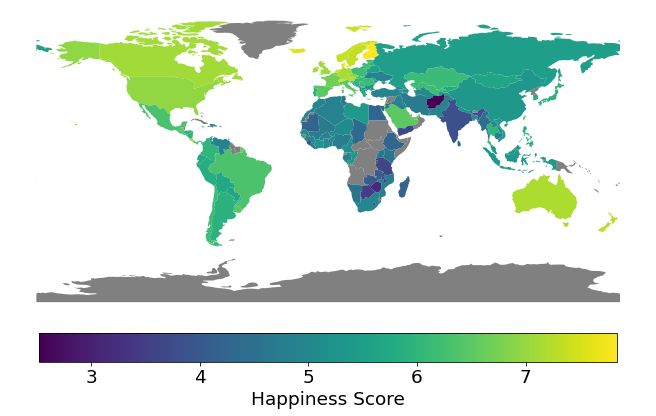

In [7]:
# choropleth of world happiness, gray countries have not data (visible axis labels and ticks)
cmap = plt.cm.viridis
fig, arg = plt.subplots(1, 1, figsize=[9,6])

data_2021 = gpd.GeoDataFrame(data_2021)
ax = data_2021.plot(column='Ladder score',cmap=cmap,ax=arg,missing_kwds={'color': 'grey'},legend=False)
ax.axis('off')

scatter = ax.collections[0]
scatter.set_clim(vmin=2.523, vmax=7.842)
cbar = plt.colorbar(scatter, ax=ax, extend='neither',orientation="horizontal",label="Happiness Score",shrink=.9)
cbar.ax.tick_params(labelsize=18.5)

cbar.set_label(label='Happiness Score',size=18.5)

arg.axis('off')

#cmap = plt.cm.get_cmap('cool')
#cmap.set_under('red')
#ax = troops.plot(column='survivors', cmap=cmap, vmin=10000, legend=False, markersize=50)
#norm = mpl.colors.Normalize(vmin=2.523, vmax=7.842)
#scatter = plt.cm.ScalarMappable(cmap=cmap)
#ax.figure.axes[-1].tick_params(axis="both", labelsize=13.5)
#cbar.extend('neither')
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
#             cax=ax, orientation='horizontal', label='Happiness Score')

# SAVE AS PDF
plt.savefig('happiness_choropleth_2021.pdf',bbox_inches='tight')

<AxesSubplot:>

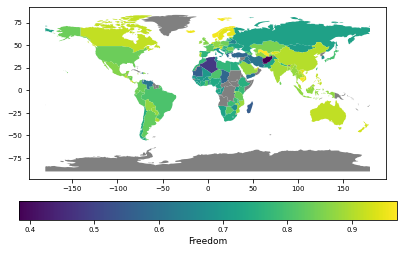

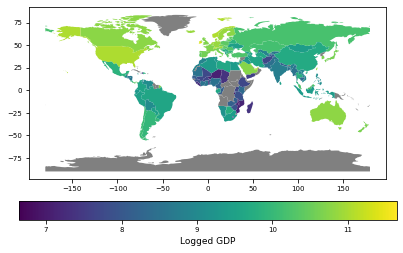

In [8]:
# choropleths of "freedom to make life choices" and "logged GDP per capita"
data_2021.plot(column = 'Freedom to make life choices',legend=True,legend_kwds={'label': "Freedom",'orientation': "horizontal"},missing_kwds={'color': 'grey'})
data_2021.plot(column = 'Logged GDP per capita',legend=True,legend_kwds={'label': "Logged GDP",'orientation': "horizontal"},missing_kwds={'color': 'grey'})

# SAVE AS PDF
# plt.savefig('freedom_choropleth_2021.pdf',bbox_inches='tight')
# plt.savefig('logGDP_choropleth_2021.pdf',bbox_inches='tight')

2.523


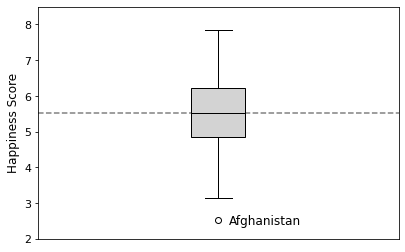

In [9]:
# boxplot of happiness distribution across countries

boxseries = data_2021["Ladder score"].dropna()
boxarray = np.array(boxseries)

plt.boxplot(boxarray,zorder=2,patch_artist=True,boxprops=dict(facecolor="lightgray"),medianprops=dict(color="black"))
plt.ylabel("Happiness Score",size=12)
plt.xticks(np.arange(1),["2021"])
plt.yticks(fontsize=11)
plt.ylim(2,8.5)
plt.xlim(.5,1.5)
plt.text(1.03,2.4,"Afghanistan",fontsize=12)
plt.show

data_2021[data_2021["Ladder score"] == min(data_2021["Ladder score"])]
plt.axhline(boxseries.median(),linestyle="dashed",zorder=1,color="gray")
print(boxseries.min())

# SAVE AS PDF
plt.savefig('boxplot_2021.pdf',bbox_inches='tight')